In [1]:
#Initialize
import json
from base64 import b64encode
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad
from Crypto.Random import get_random_bytes
from base64 import b64decode
from Crypto.Util.Padding import unpad
from PIL import Image 
import io
import math
import PIL 
import hashlib
import time
import glob
import os
import pathlib
import cv2 

from matplotlib import pyplot as plt 

import numpy as np



In [2]:
def generateHistogram(img):
    fig = plt.figure()
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.title('Histogram Citra ')
        plt.xlim([0,256])
    return fig

def generateHorizontalCorrelation(img, filename):
    x = img[0:img.shape[0]-1,0:img.shape[1]-1,0]
    y = img[1:img.shape[0],0:img.shape[1]-1,0]
    fig = plt.figure()
    plt.scatter(x, y, s=0.01, alpha=0.5)
    plt.title(filename+'\nHorizontal pixel correlation')
    plt.xlabel('pixel value at (x,y)')
    plt.ylabel('pixel value at (x+1,y)')
    return fig

def generateVerticalCorrelation(img, filename):
    x = img[0:img.shape[0]-1,0:img.shape[1]-1,0]
    y = img[0:img.shape[0]-1,1:img.shape[1],0]
    fig = plt.figure()
    plt.scatter(x, y, s=0.01, alpha=0.5)
    plt.title(filename+'\nVertical pixel correlation')
    plt.xlabel('pixel value at (x,y)')
    plt.ylabel('pixel value at (x,y+1)')
    return fig

def generateDiagonalCorrelation(img, filename):
    x = img[0:img.shape[0]-1,0:img.shape[1]-1,0]
    y = img[1:img.shape[0],1:img.shape[1],0]
    fig = plt.figure()
    plt.scatter(x, y, s=0.01, alpha=0.5)
    plt.title(filename+'\nDiagonal pixel correlation')
    plt.xlabel('pixel value at (x,y)')
    plt.ylabel('pixel value at (x+1,y+1)')
    return fig

def generateExeTimeComp(D):
    fig = plt.figure()
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    return fig
    

In [3]:
class Encaes:
    def __init__(self, key, data):
        self.key = key
        self.data = data
        
    def ori(self):
        #cipher = AES.new(self.key, AES.MODE_ECB)
        #ct_bytes = cipher.encrypt(pad(self.data, AES.block_size))
        ct = b64encode(self.data).decode()
        return (json.dumps({'ciphertext':ct}))
        
    def ecb(self):
        cipher = AES.new(self.key, AES.MODE_ECB)
        ct_bytes = cipher.encrypt(pad(self.data, AES.block_size))
        ct = b64encode(ct_bytes).decode()
        return (json.dumps({'ciphertext':ct}))

    def cbc(self):
        cipher = AES.new(self.key, AES.MODE_CBC)
        ct_bytes = cipher.encrypt(pad(self.data, AES.block_size))
        iv = b64encode(cipher.iv).decode()
        ct = b64encode(ct_bytes).decode()
        return (json.dumps({'iv':iv, 'ciphertext':ct}))
    
    def ctr(self):
        cipher = AES.new(self.key, AES.MODE_CTR)
        ct_bytes = cipher.encrypt(self.data)
        nonce = b64encode(cipher.nonce).decode()
        ct = b64encode(ct_bytes).decode()
        return (json.dumps({'nonce':nonce, 'ciphertext':ct}))
    
    def cfb(self):
        cipher = AES.new(self.key, AES.MODE_CFB)
        ct_bytes = cipher.encrypt(self.data)
        iv = b64encode(cipher.iv).decode()
        ct = b64encode(ct_bytes).decode()
        return (json.dumps({'iv':iv, 'ciphertext':ct}))

    def ofb(self):
        cipher = AES.new(self.key, AES.MODE_OFB)
        ct_bytes = cipher.encrypt(self.data)
        iv = b64encode(cipher.iv).decode()
        ct = b64encode(ct_bytes).decode()
        return (json.dumps({'iv':iv, 'ciphertext':ct}))

b'(\x16\xe3\x1d\x07ph\xa4\xfcC\x00\x82M\xb6Y\xea'
b'(\x16\xe3\x1d\x07ph\xa4\xfcC\x00\x82M\xb6Y\xea'
b'(\x16\xe3\x1d\x07ph\xa4\xfcC\x00\x82M\xb6Y\xea'


C:\Users\witom\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\witom\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


b'(\x16\xe3\x1d\x07ph\xa4\xfcC\x00\x82M\xb6Y\xea'
b'(\x16\xe3\x1d\x07ph\xa4\xfcC\x00\x82M\xb6Y\xea'


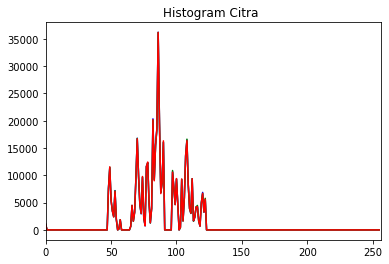

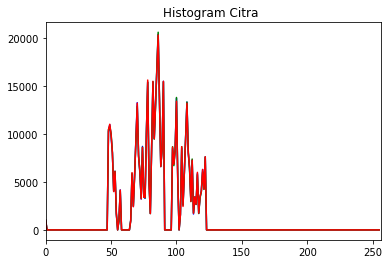

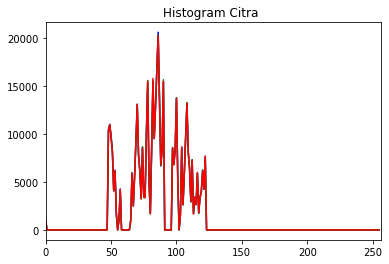

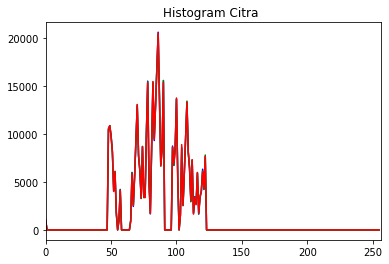

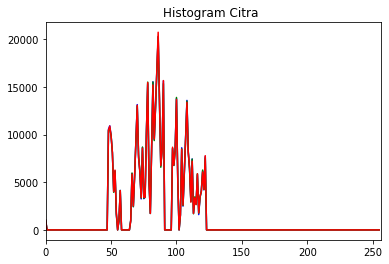

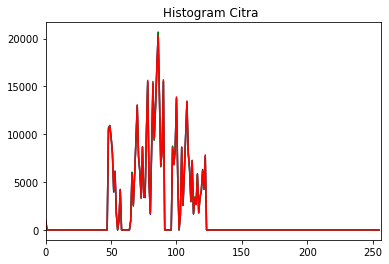

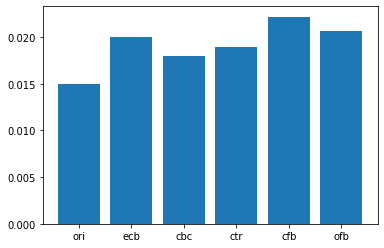

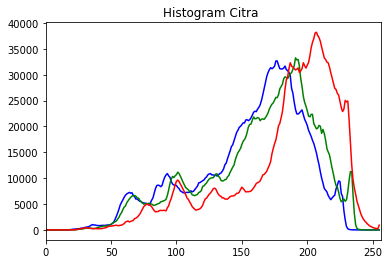

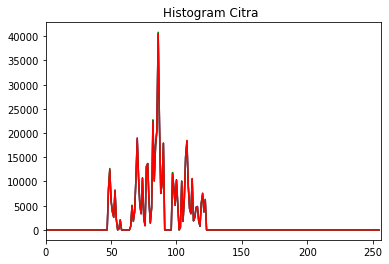

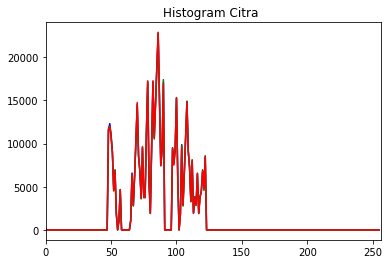

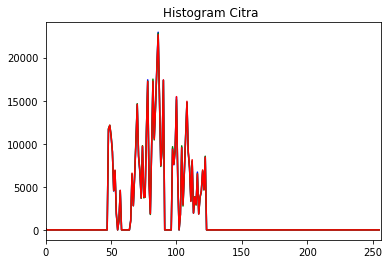

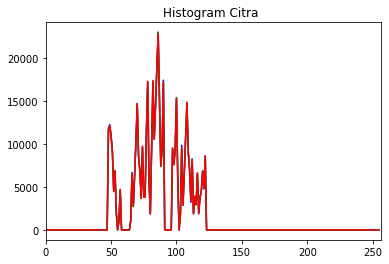

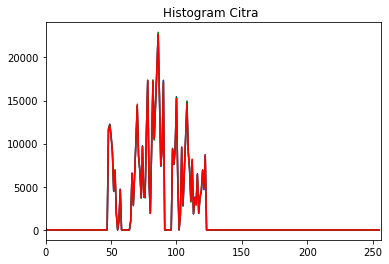

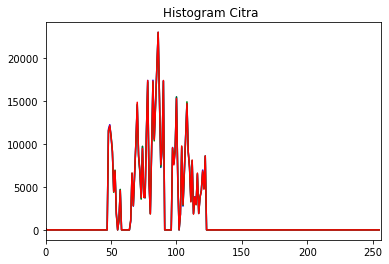

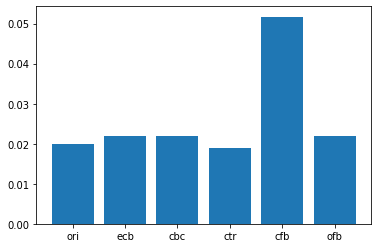

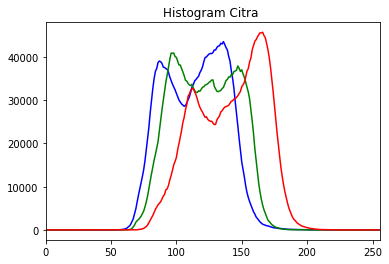

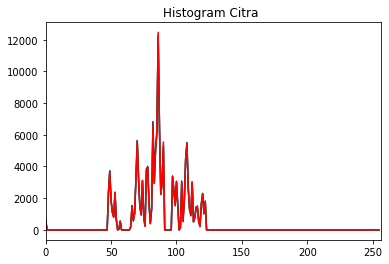

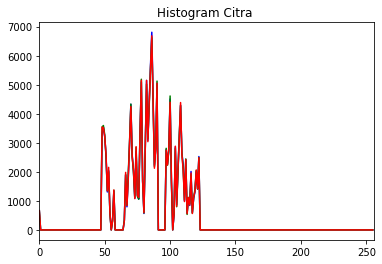

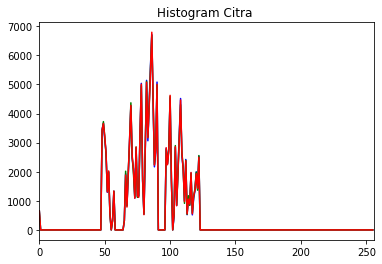

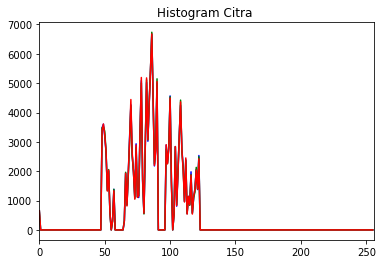

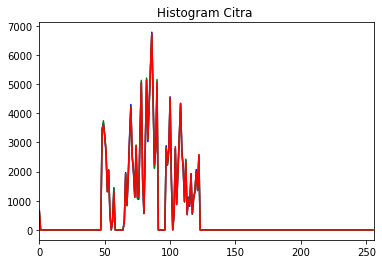

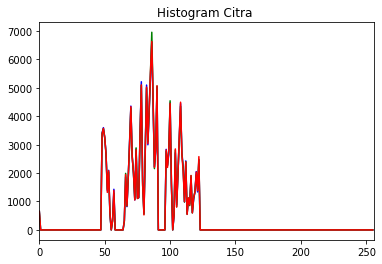

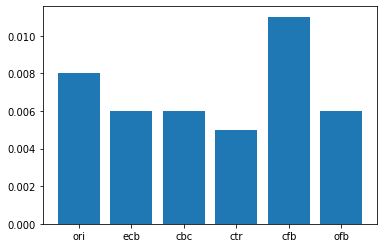

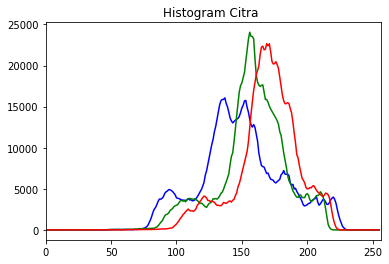

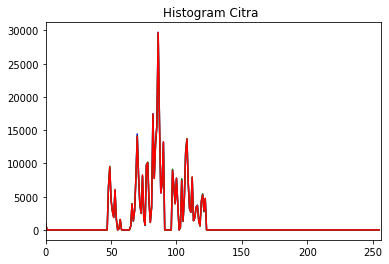

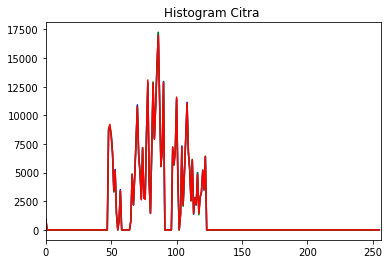

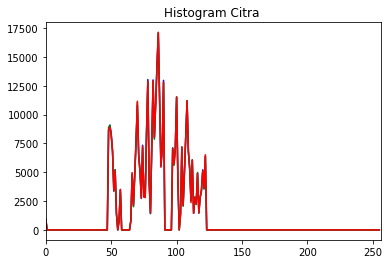

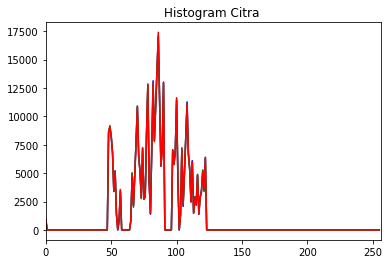

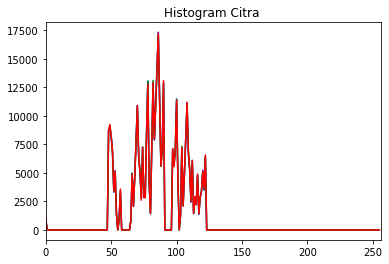

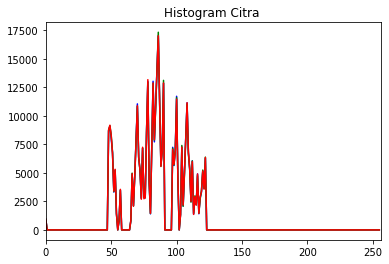

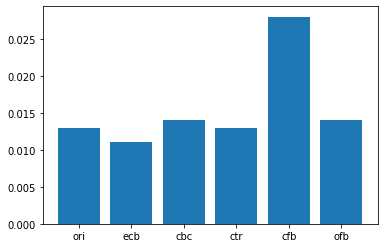

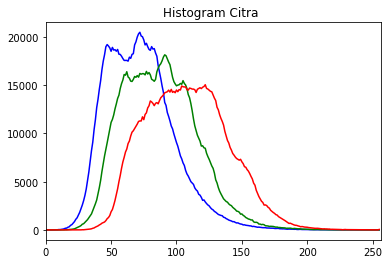

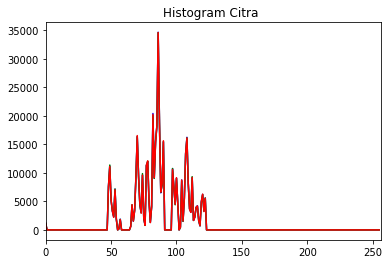

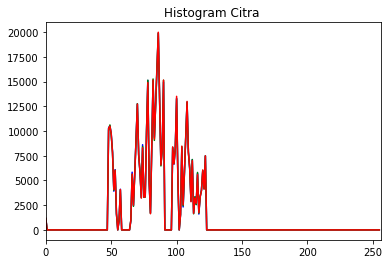

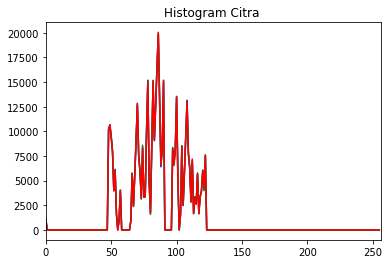

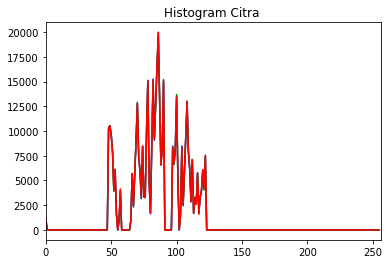

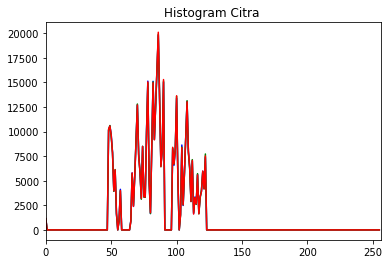

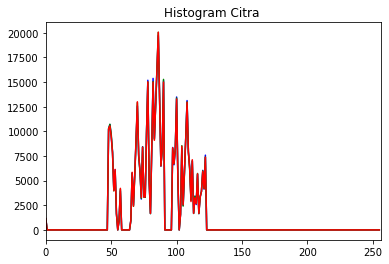

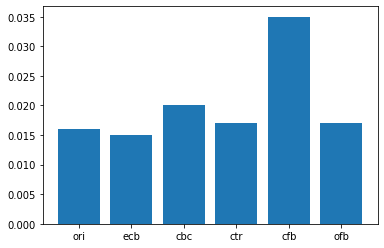

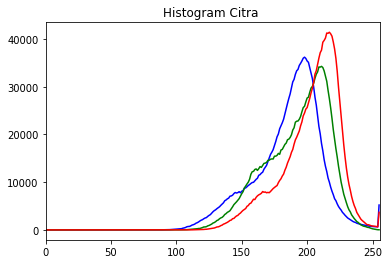

In [4]:
path = 'F:\\skin-cancer-mnist-ham10000\\gambardokter'
for filename in glob.glob(os.path.join(path, '*.jpg')):
    with open(os.path.join(os.getcwd(), filename), 'rb') as f: # open in readonly mode
        
        
        
        
        fname = pathlib.Path(filename).stem
        
        pack = {}
        time_t = {}
        exec_time = {}
        sv_path = os.path.join(path, 'enc', fname)
        os.makedirs(sv_path)
        
        
        
        start_time_0 = time.time()
        
        with open(os.path.join(path, 'key'), 'rb') as tk:
            the_key = tk.read()
        
        print (the_key)
            
        my_string = b64encode(f.read())
        tbe_image = Encaes(the_key, my_string)
        
        end_time_0 = time.time()
        exec_time_0 = end_time_0 - start_time_0
        
        
        
        time_0 = time.time()
        pack["ori"] = b64encode(tbe_image.ori().encode())
        time_1 = time.time()
        pack["ecb"] = b64encode(tbe_image.ecb().encode())
        time_2 = time.time()
        pack["cbc"] = b64encode(tbe_image.cbc().encode())
        time_3 = time.time()
        pack["ctr"] = b64encode(tbe_image.ctr().encode())
        time_4 = time.time()
        pack["cfb"] = b64encode(tbe_image.cfb().encode())
        time_5 = time.time()
        pack["ofb"] = b64encode(tbe_image.ofb().encode())
        time_6 = time.time()
        
        time_t["ori"] = time_1 - time_0
        time_t["ecb"] = time_2 - time_1
        time_t["cbc"] = time_3 - time_2
        time_t["ctr"] = time_4 - time_3
        time_t["cfb"] = time_5 - time_4
        time_t["ofb"] = time_6 - time_5
        
        
        
        for p in pack:
            
            start_timep = time.time()
            
            my_string = pack[p]
            
            # calculate sizes
            num_bytes = len(my_string)
            num_pixels = int((num_bytes+2)/3)                     # 3 bytes per pixel
            W = H = int(math.ceil(num_pixels ** 0.5))             # W=H, such that everything fits in

            # fill the image with zeros, because probably len(imagedata) < needed W*H*3
            imagedata = my_string + '\0'.encode('ascii') * (W*H*3 - len(my_string))

            image = Image.frombytes('RGB', (W, H), imagedata)         # create image
            
            end_timep = time.time()
            
            image.save (os.path.join(sv_path, p) + '.bmp')
            
            exec_t = end_timep - start_timep 
            
            exec_time[p] = exec_time_0 + time_t[p] + exec_t
            
            #print (exec_time_0, " ", time_t[p], " ", exec_t, " ", num_bytes)
            
            generateHistogram(np.array(image)).savefig(os.path.join(sv_path, 'hist_'+p+'.png'))
            
        #print (json.dumps({"File Name":fname, "Execution Time": exec_time}))
        
        #with open(os.path.join(sv_path, "EncriptionStats") + '.json', 'w') as json_file:
            #json.dump({"File Name":fname, "Execution Time": exec_time}, json_file)
            
        generateExeTimeComp(exec_time).savefig(os.path.join(sv_path, 'ExecutionTime'+'.png'))
        
        imgo = cv2.imread(filename)
        
        generateHistogram(imgo).savefig(os.path.join(sv_path, 'hist_'+fname+'.png'))
        
        
        

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\histogram.cpp:160: error: (-215:Assertion failed) j < nimages in function 'cv::histPrepareImages'


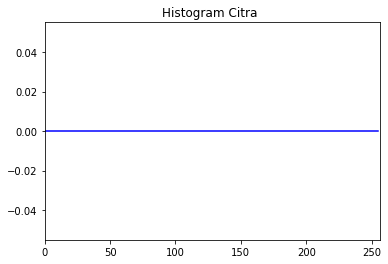

In [5]:
dir = os.path.join('..', 'Source Code', 'images')
filename = 'ISIC_0024312'

enum = ('original','confused','encrypted')
for i,col in enumerate(enum):
    flag = col
    type = '.png'
    if col == 'original':
        type = '.jpg' 
        flag = ''
    read_dir = os.path.join(dir, flag, filename+type)
    img = cv2.imread(os.path.abspath(read_dir), cv2.IMREAD_UNCHANGED)

    save_dir = os.path.join('..', 'Source Code', 'analyzed')
    
    #Histogram
    generateHistogram(img, col).savefig(os.path.join(save_dir, 'hist_'+col+'_'+filename+'.png'))

    #Correlation
    if col == 'original' or col == 'encrypted':
        save_dir = os.path.join('..', 'Source Code', 'analyzed')
        generateHorizontalCorrelation(img, filename).savefig(os.path.join(save_dir, 'corr_'+col+'_horizontal_'+filename+'.png'))
        generateVerticalCorrelation(img, filename).savefig(os.path.join(save_dir, 'corr_'+col+'_vertical_'+filename+'.png'))
        generateDiagonalCorrelation(img, filename).savefig(os.path.join(save_dir, 'corr_'+col+'_diagonal_'+filename+'.png'))